In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [2]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [3]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [4]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [5]:
data1 = data.drop(csv1.index[5000:]) #reduce dataset to 10% of original dataframe
#data.head()

In [6]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
4995,@HWI-D00360:5:H814YADXX:1:1101:18515:3754 1:N:...,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,BCCFFFFFHGHHHJIJJJJIJJJIIIJJIIIHJJJJJJJJIJIJJJ...,700.041
4996,@HWI-D00360:5:H814YADXX:1:1101:18597:3869 1:N:...,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,CCCFFFFFGHHDHIJJJJJGIJJJJJJJIHIJJJIJJIIDHHIDII...,239.041
4997,@HWI-D00360:5:H814YADXX:1:1101:18687:3872 1:N:...,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJIJFHHIIII...,231.041
4998,@HWI-D00360:5:H814YADXX:1:1101:18640:3880 1:N:...,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,@@@FFFFFHHHHGJJJIGGGIIIJJIIIIJIIHJIIJJJJGIDHII...,787.500
4999,@HWI-D00360:5:H814YADXX:1:1101:18520:3923 1:N:...,TCACAAGGTTTTATATCAGCAACAGAGGACTAAGACCAAATATTTC...,CCCFFFFFDFHHHJJJJJJJJJJJJIJJJJJJJJJJJJJJJJJJJJ...,752.125


In [7]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

seq_trans = le.fit_transform(data1["read_sequence"])
seq_ide_trans = le.fit_transform(data1["sequence_identifier"])
quali_trans = le.fit_transform(data1["quality"])


In [8]:
data1['seq_encoded']=seq_trans
data1['seq_id_encoded']=seq_ide_trans
data1['qual_encoded']=quali_trans
data1.head()

,sequence_identifier,read_sequence,quality,execution_time,seq_encoded,seq_id_encoded,qual_encoded
0,@HWI-D00360:5:H814YADXX:1:1101:1205:2142 1:N:0...,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJIJJJJJIJ...,2295.125,2451,518,4608
1,@HWI-D00360:5:H814YADXX:1:1101:1244:2206 1:N:0...,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,@<;DFFFFFDDHDGGGGGGIGFGIGEIIGICHGIEDEGGHGGHHGF...,674.000,4351,623,231
2,@HWI-D00360:5:H814YADXX:1:1101:1295:2128 1:N:0...,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJHIJJJJJJJJIJJHJJI...,757.209,804,765,4288
3,@HWI-D00360:5:H814YADXX:1:1101:1460:2184 1:N:0...,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,;@@DDEFFHGHHHGIIIFIIIGICGCHHHGI?FHIIHDCA>GHIII...,397.042,1314,1261,48
4,@HWI-D00360:5:H814YADXX:1:1101:1597:2113 1:N:0...,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,675.000,1870,1636,4968


In [9]:
data1.nunique()

sequence_identifier    5000
read_sequence          5000
quality                5000
execution_time         4683
seq_encoded            5000
seq_id_encoded         5000
qual_encoded           5000
dtype: int64

In [10]:
data1 = data1.drop(['sequence_identifier','read_sequence','quality'], axis = 1)
data1.head()

,execution_time,seq_encoded,seq_id_encoded,qual_encoded
0,2295.125,2451,518,4608
1,674.000,4351,623,231
2,757.209,804,765,4288
3,397.042,1314,1261,48
4,675.000,1870,1636,4968


In [11]:
data1.describe()

,execution_time,seq_encoded,seq_id_encoded,qual_encoded
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2048.332630,2499.500000,2499.500000,2499.500000
std,4126.782632,1443.520003,1443.520003,1443.520003
min,196.458000,0.000000,0.000000,0.000000
25%,559.416750,1249.750000,1249.750000,1249.750000
50%,676.042000,2499.500000,2499.500000,2499.500000
75%,1448.677750,3749.250000,3749.250000,3749.250000
max,65904.334000,4999.000000,4999.000000,4999.000000


In [12]:
data1 = data1.drop(['seq_id_encoded','qual_encoded'], axis = 1)
data1.head()

,execution_time,seq_encoded
0,2295.125,2451
1,674.000,4351
2,757.209,804
3,397.042,1314
4,675.000,1870


In [13]:
Y= data1[['execution_time']]

#Y=np.ravel(Y)
X= data1.drop('execution_time', axis =1)

In [14]:
Y['execution_time']= np.log10(Y.execution_time)
Y

<ipython-input-14-ccc6ac07e441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['execution_time']= np.log10(Y.execution_time)


,execution_time
0,3.360806
1,2.828660
2,2.879216
3,2.598836
4,2.829304
...,...
4995,2.845123
4996,2.378472
4997,2.363689
4998,2.896251


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (4000, 1)
X_test (1000, 1)
y_train (4000, 1)
y_test (1000, 1)


In [16]:
#y_test

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 32
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim = 1),
#     keras.layers.Dense(M, activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(M, activation=tf.nn.relu),
#     keras.layers.Dense(M, activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
    #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [19]:
#history = model.fit(X_train, y_train, epochs=300, batch_size=128, verbose=True, validation_data = (X_test,y_test))
history = model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=True, validation_split = 0.2)

Epoch 1/100
4/4 [==============================] - 1s 49ms/step - loss: 1679953.7500 - accuracy: 0.0000e+00 - val_loss: 1507368.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1485673.0000 - accuracy: 0.0000e+00 - val_loss: 1327915.6250 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1307011.2500 - accuracy: 0.0000e+00 - val_loss: 1162437.1250 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1143286.7500 - accuracy: 0.0000e+00 - val_loss: 1011040.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 992476.0625 - accuracy: 0.0000e+00 - val_loss: 873438.8750 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 855071.3750 - accuracy: 0.0000e+00 - val_loss: 749564.9375 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] 

In [20]:
ypred = model.predict(X_test)

32/32 [==============================] - 0s 677us/step


In [21]:
ypred.shape

(1000, 1)

In [22]:
from sklearn.metrics import r2_score
# r2_train = r2_score(X_train,y_train)
# r2_train

In [23]:
r2_test = r2_score (y_test,ypred)
r2_test 

-12.804844627346434

In [24]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ypred))
rmse 

1.6569619043282982

In [30]:
from sklearn.metrics import mean_squared_error
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 2.7455


In [31]:
from sklearn.metrics import mean_squared_log_error
# rmsle = mean_squared_log_error(y_test,ypred)**0.5
# rmsle

In [33]:
y_pred_non_log = 10**(ypred)
y_test_non_log = 10**(y_test)

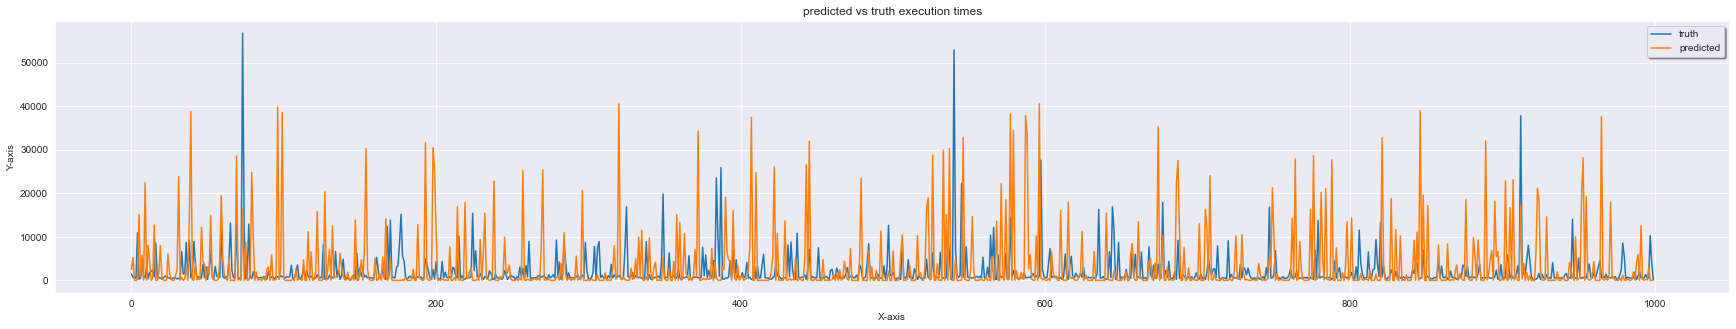

In [34]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax,y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [35]:
#ypred

In [36]:
#y_pred_non_log

In [37]:
from sklearn.metrics import mean_squared_log_error
rmsle_non_log = mean_squared_log_error(y_test_non_log,y_pred_non_log)**0.5
rmsle_non_log

3.6237473685303443

In [39]:
r2_test_non_log = r2_score (y_test_non_log,y_pred_non_log)
r2_test_non_log 

-3.193708121407922